In [1]:
# modules import
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import cartopy.crs as ccrs

In [2]:
# Open data

# file path
netCDF_NEMO_fileT = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/NETCDF_fluxes_TEMP.nc'
netCDF_NEMO_fileP = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fluxes/NETCDF_fluxes_PREC2.nc'
netCDF_NEMO_fileW = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fluxes/NETCDF_fluxes_WIND2.nc'

# open file
FLXT = xr.open_mfdataset(netCDF_NEMO_fileT)
FLXT['year']= FLXT.time.dt.year
FLXT_mean = FLXT.where(FLXT.year > 1988).mean('time')
FLXT_mean['Buoyancy'] = - 9.81/3974 * FLXT_mean['alpha'] * FLXT_mean['hfxout'] + 9.81 * FLXT_mean['beta'] * (FLXT_mean['empmr'] + FLXT_mean['runoffs']) * FLXT_mean['S_surface'] 
FLXT_mean['Effective_volume'] =  FLXT_mean['sivolu'] / 246793977292.72095

FLXP = xr.open_mfdataset(netCDF_NEMO_fileP)
FLXP['year']= FLXP.time.dt.year
FLXP_mean = FLXP.where(FLXP.year > 1988).mean('time')
FLXP_mean['Buoyancy'] = - 9.81/3974 * FLXP_mean['alpha'] * FLXP_mean['hfxout'] + 9.81 * FLXP_mean['beta'] * (FLXP_mean['empmr'] + FLXP_mean['runoffs']) * FLXP_mean['S_surface'] 
FLXP_mean['Effective_volume'] =  FLXP_mean['sivolu'] / 246793977292.72095

FLXW = xr.open_mfdataset(netCDF_NEMO_fileW)
FLXW['year']= FLXW.time.dt.year
FLXW_mean = FLXW.where(FLXW.year > 1988).mean('time')
FLXW_mean['Buoyancy'] = - 9.81/3974 * FLXW_mean['alpha'] * FLXW_mean['hfxout'] + 9.81 * FLXW_mean['beta'] * (FLXW_mean['empmr'] + FLXW_mean['runoffs']) * FLXW_mean['S_surface'] 
FLXW_mean['Effective_volume'] =  FLXW_mean['sivolu'] / 246793977292.72095

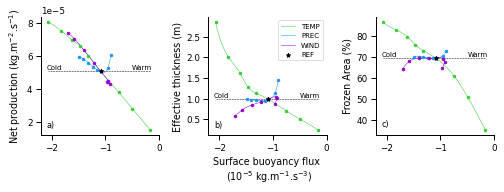

In [3]:
sns.set_context('paper')

## smooth line
# vfxice
xET = np.array(-FLXT_mean.Buoyancy * 1e5)
yET = np.array(- FLXT_mean.vfxice * 917 / 86400)
xET_new = np.linspace(xET.min(), xET.max(), 300)
a_BSpline = make_interp_spline(xET, yET)
yET_new = a_BSpline(xET_new)

xEP = np.array(-FLXP_mean.Buoyancy * 1e5)
yEP = np.array(- FLXP_mean.vfxice * 917 / 86400)
xEP_new = np.linspace(xEP.min(), xEP.max(), 300)
a_BSpline = make_interp_spline(xEP, yEP)
yEP_new = a_BSpline(xEP_new)

xEW = np.array(-FLXW_mean.Buoyancy[:-1] * 1e5)
yEW = np.array(-FLXW_mean.vfxice[:-1] * 917 / 86400)
xEW_new = np.linspace(xEW.min(), xEW.max(), 300)
a_BSpline = make_interp_spline(xEW, yEW)
yEW_new = a_BSpline(xEW_new)

xEWmin = np.array(-FLXW_mean.Buoyancy[-2:] * 1e5)
yEWmin = np.array(-FLXW_mean.vfxice[-2:] * 917 / 86400)

# volume
xVT = np.array(-FLXT_mean.Buoyancy * 1e5)
yVT = np.array(FLXT_mean.Effective_volume)
xVT_new = np.linspace(xVT.min(), xVT.max(), 300)
a_BSpline = make_interp_spline(xVT, yVT)
yVT_new = a_BSpline(xVT_new)

xVP = np.array(-FLXP_mean.Buoyancy * 1e5)
yVP = np.array(FLXP_mean.Effective_volume)
xVP_new = np.linspace(xVP.min(), xVP.max(), 300)
a_BSpline = make_interp_spline(xVP, yVP)
yVP_new = a_BSpline(xVP_new)

xVW = np.array(-FLXW_mean.Buoyancy[:-1] * 1e5)
yVW = np.array(FLXW_mean.Effective_volume[:-1])
xVW_new = np.linspace(xVW.min(), xVW.max(), 300)
a_BSpline = make_interp_spline(xVW, yVW)
yVW_new = a_BSpline(xVW_new)

xVWmin = np.array(-FLXW_mean.Buoyancy[-2:] * 1e5)
yVWmin = np.array(FLXW_mean.Effective_volume[-2:])

# extent
xCT = np.array(-FLXT_mean.Buoyancy * 1e5)
yCT = np.array(FLXT_mean.extent * 100)
xCT_new = np.linspace(xCT.min(), xCT.max(), 300)
a_BSpline = make_interp_spline(xCT, yCT)
yCT_new = a_BSpline(xCT_new)

xCP = np.array(-FLXP_mean.Buoyancy * 1e5)
yCP = np.array(FLXP_mean.extent * 100)
xCP_new = np.linspace(xCP.min(), xCP.max(), 300)
a_BSpline = make_interp_spline(xCP, yCP)
yCP_new = a_BSpline(xCP_new)

xCW = np.array(-FLXW_mean.Buoyancy[:-1] * 1e5)
yCW = np.array(FLXW_mean.extent[:-1] * 100)
xCW_new = np.linspace(xCW.min(), xCW.max(), 300)
a_BSpline = make_interp_spline(xCW, yCW)
yCW_new = a_BSpline(xCW_new)

xCWmin = np.array(-FLXW_mean.Buoyancy[-2:] * 1e5)
yCWmin = np.array(FLXW_mean.extent[-2:] * 100)

# x and y axis limit
Bminmax = np.array([FLXT_mean.Buoyancy.min(), FLXT_mean.Buoyancy.max()])
SIP = np.array([FLXT_mean.vfxice[5]* 917 / 86400, FLXT_mean.vfxice[5]* 917 / 86400])
SIV = np.array([FLXT_mean.Effective_volume[5], FLXT_mean.Effective_volume[5]])
SIE = np.array([FLXT_mean.extent[5], FLXT_mean.extent[5]])

# colormap
color_TEMP = ['darkblue', 'royalblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'lightgreen', 'limegreen', 'darkgreen']
color_PREC = ['darkblue', 'royalblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'lightgreen', 'darkgreen']
color_WIND = ['darkblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'lightgreen', 'limegreen', 'darkgreen']

## figure
f = plt.figure(figsize = (7.09, 2.76))
ax={}
nb_rows = 1
nb_cols = 3

# Net production vs Buoyancy flux
ax1 = f.add_subplot(nb_rows,nb_cols, 1)
ax1.plot(-Bminmax * 1e5, - SIP, linewidth = 0.5, linestyle = '--', color = 'black')
ax1.plot(xET_new, yET_new, linewidth = 0.5, linestyle = '-', color = 'limegreen', label='TEMP', zorder=1)
ax1.plot(xEP_new, yEP_new, linewidth = 0.5, linestyle = '-', color = 'dodgerblue', label='PREC', zorder=2)
ax1.plot(xEW_new, yEW_new, linewidth = 0.5, linestyle = '-', color = 'darkviolet', label='WIND', zorder=3)
ax1.plot(xEWmin, yEWmin, linewidth = 0.5, linestyle = '-', color = 'darkviolet',  zorder=4)
ax1.scatter(-FLXT_mean.Buoyancy * 1e5, - FLXT_mean.vfxice * 917 / 86400, s = 7, marker = 'o', color = 'limegreen', zorder=5)
ax1.scatter(-FLXP_mean.Buoyancy * 1e5, - FLXP_mean.vfxice * 917 / 86400, s = 7, marker = 'o', color = 'dodgerblue', zorder=6)
ax1.scatter(-FLXW_mean.Buoyancy * 1e5, - FLXW_mean.vfxice * 917 / 86400, s = 7, marker = 'o', color = 'darkviolet', zorder=7)
ax1.scatter(- FLXT_mean.Buoyancy[5] * 1e5, - FLXT_mean.vfxice[5] * 917 / 86400, s = 20, marker = '*', color = 'black',  label='REF', zorder=8)
ax1.text(-2.1, 1.02 *( - FLXT_mean.vfxice[5] * 917 / 86400), 'Cold', fontsize=7, color = 'black')
ax1.text(-0.5, 1.02 * (- FLXT_mean.vfxice[5] * 917 / 86400), 'Warm', fontsize=7, color = 'black')
ax1.text(-2.1, 1.65e-5, 'a)', fontsize=8, color = 'black')
ax1.set_ylabel('Net production (kg.m$^{-2}$.s$^{-1}$)')
ax1.set_xlim(-2.2,0)

# Effective thickness vs Buoyancy flux
ax2 = f.add_subplot(nb_rows,nb_cols, 2)
ax2.plot(-Bminmax * 1e5, SIV, linewidth = 0.5, linestyle = '--', color = 'black')
ax2.plot(xVT_new, yVT_new, linewidth = 0.5, linestyle = '-', color = 'limegreen', label='TEMP', zorder=1)
ax2.plot(xVP_new, yVP_new, linewidth = 0.5, linestyle = '-', color = 'dodgerblue', label='PREC', zorder=2)
ax2.plot(xVW_new, yVW_new, linewidth = 0.5, linestyle = '-', color = 'darkviolet', label='WIND', zorder=3)
ax2.plot(xVWmin, yVWmin, linewidth = 0.5, linestyle = '-', color = 'darkviolet',  zorder=4)
ax2.scatter(-FLXT_mean.Buoyancy * 1e5, FLXT_mean.Effective_volume, s = 7, marker = 'o',  color = 'limegreen', zorder=5)
ax2.scatter(-FLXP_mean.Buoyancy * 1e5, FLXP_mean.Effective_volume, s = 7, marker = 'o',  color = 'dodgerblue', zorder=6)
ax2.scatter(-FLXW_mean.Buoyancy * 1e5, FLXW_mean.Effective_volume, s = 7, marker = 'o',  color = 'darkviolet', zorder=7)
ax2.scatter(- FLXT_mean.Buoyancy[5] * 1e5, FLXT_mean.Effective_volume[5], s = 20, marker = '*', color = 'black',  label='REF', zorder=8)
ax2.set_xlabel('Surface buoyancy flux \n (10$^{-5}$ kg.m$^{-1}$.s$^{-3}$)')
ax2.set_ylabel('Effective thickness (m)')
ax2.set_xlim(-2.2,0)
plt.legend(loc = 'upper right', prop={"size":7})
ax2.text(-2.1, 1.04 * (FLXT_mean.Effective_volume[5]), 'Cold', fontsize=7, color = 'black')
ax2.text(-0.5, 1.04 * (FLXT_mean.Effective_volume[5]), 'Warm', fontsize=7, color = 'black')
ax2.text(-2.1, 0.3, 'b)', fontsize=8, color = 'black')

# Frozen area vs Buoyancy flux
ax3 = f.add_subplot(nb_rows,nb_cols, 3)
ax3.plot(xCT_new, yCT_new, linewidth = 0.5, linestyle = '-', color = 'limegreen', label='TEMP', zorder=1)
ax3.plot(xCP_new, yCP_new, linewidth = 0.5, linestyle = '-', color = 'dodgerblue', label='PREC', zorder=2)
ax3.plot(xCW_new, yCW_new, linewidth = 0.5, linestyle = '-', color = 'darkviolet', label='WIND', zorder=3)
ax3.plot(xCWmin, yCWmin, linewidth = 0.5, linestyle = '-', color = 'darkviolet',  zorder=4)
ax3.plot(-Bminmax * 1e5, SIE * 100, linewidth = 0.5, linestyle = '--', color = 'black')
ax3.scatter(-FLXT_mean.Buoyancy * 1e5, FLXT_mean.extent * 100, s = 7, marker = 'o', label='TEMP', color = 'limegreen', zorder=5)
ax3.scatter(-FLXP_mean.Buoyancy * 1e5, FLXP_mean.extent * 100, s = 7, marker = 'o', label='PREC', color = 'dodgerblue', zorder=6)
ax3.scatter(-FLXW_mean.Buoyancy * 1e5, FLXW_mean.extent * 100, s = 7, marker = 'o', label='WIND', color = 'darkviolet', zorder=7)
ax3.scatter(- FLXT_mean.Buoyancy[5] * 1e5, FLXT_mean.extent[5] * 100, s = 20, marker = '*', color = 'black',  label='REF', zorder=8)
ax3.set_ylabel('Frozen Area (%)')
ax3.set_xlim(-2.2,0)
ax3.text(-2.1, 1.01 * (FLXT_mean.extent[5] * 100), 'Cold', fontsize=7, color = 'black')
ax3.text(-0.5, 1.01 * (FLXT_mean.extent[5] * 100), 'Warm', fontsize=7, color = 'black')
ax3.text(-2.1, 37, 'c)', fontsize=8, color = 'black')

plt.tight_layout()
sns.despine()

# saved figure
plt.savefig('/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/seaice_essai.pdf')